**Author**: Rana Touqeer Attique 

**Date**: 11/12/2025 

**Case Study**: Manchester Echoes Visitor Sentiment Study at Heaton Park

**Note**: This dataset has been intentionally modified for research and learning purposes. Several variables were programmatically manipulated to introduce controlled ambiguity and realistic behavioural patterns. The dataset should therefore be used for analytical demonstration, modelling, and exploratory research only, and not interpreted as a direct representation of real-world survey outcomes.

**Key Points**

• Data cleaning and data wrangling

• Handling missing, ambiguous, and inconsistent values

• Exploratory Data Analysis (EDA)

• Analysis of demographic and attendance patterns

• Data preparation for sentiment analysis

• Text normalization and feedback consolidation

• Sentiment analysis using NLP techniques (VADER and DistilBERT models)

• Insight extraction from sentiment results

• Visualisation of key findings

• Word cloud generation to highlight dominant feedback themes






In [1]:
import os
import sys

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')




In [2]:
# 'darkgrid'
# 'whitegrid'
# 'dark'
# 'white'
# 'ticks'
# Apply the default theme
# sns.set_theme(style='whitegrid')
sns.set_theme(style='dark', palette='pastel')
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:10]

In [3]:
image_S='D:/Manchester Echoes Visitor Sentiment Study/Images/'
file_path = 'D:/Manchester Echoes Visitor Sentiment Study/data/dataset_with_feedback.csv'
df = pd.read_csv(file_path)

df.head()

,PreEvent_Information_Source,First_Name,Last_Name,Age_Group,Gender,Email,Phone,Visitor_City,County,Latitude,Longitude,Travel_method,First_impression,What_we_can_improve,Want_to_see_next_year,Volunteer_Next_Year
0,Website Information Page,Rana,Attique,31 to 35,Male,touqeerattiq@gmail.com,1.233457e+09,Manchester,Greater Manchester,53.479489,-2.245115,Car,Some food stalls overpriced,Longer queues 4 popular stalls,More picnic zones near attractions,1
1,App Instructions,NaN,NaN,18 to 25,Male,NaN,NaN,Derby,Derbyshire,52.914223,-1.471988,Taxi,Too noisy 4 kids,More variety in food stalls,More costume / fancy dress activities,1
2,No Guidance,NaN,NaN,18 to 25,Male,NaN,NaN,Sheffield,South Yorkshire,53.380663,-1.470228,Uber,Inclusive & accessible spaces for all ages n a...,More water stations,improved signage,1
3,Website Information Page,NaN,NaN,18 to 25,Trans Woman,NaN,NaN,Bradford,West Yorkshire,53.794423,-1.751919,Tram,Some areas too crowded,more local artisan stalls,More funfair rides,1
4,Website Information Page,NaN,NaN,Over 40,Male,NaN,NaN,Derby,Derbyshire,52.914223,-1.471988,Bus,Treasure hunts / scavenger hunts,Cheaper food options,better organization,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26857 entries, 0 to 26856
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   PreEvent_Information_Source  26857 non-null  object 
 1   First_Name                   1 non-null      object 
 2   Last_Name                    1 non-null      object 
 3   Age_Group                    26857 non-null  object 
 4   Gender                       26857 non-null  object 
 5   Email                        1 non-null      object 
 6   Phone                        1 non-null      float64
 7   Visitor_City                 26857 non-null  object 
 8   County                       26857 non-null  object 
 9   Latitude                     26857 non-null  float64
 10  Longitude                    26857 non-null  float64
 11  Travel_method                26857 non-null  object 
 12  First_impression             26857 non-null  object 
 13  What_we_can_impr

Note: As data have sensitive information so i intentially did not include personal information e.g First_Name,Last_Name,Email,Phone etc. I will drop those columns, although already delete this information from the dataset before uploading.

In [5]:
df=df.drop(['First_Name','Last_Name','Email','Phone'], axis=1)
df.head()

,PreEvent_Information_Source,Age_Group,Gender,Visitor_City,County,Latitude,Longitude,Travel_method,First_impression,What_we_can_improve,Want_to_see_next_year,Volunteer_Next_Year
0,Website Information Page,31 to 35,Male,Manchester,Greater Manchester,53.479489,-2.245115,Car,Some food stalls overpriced,Longer queues 4 popular stalls,More picnic zones near attractions,1
1,App Instructions,18 to 25,Male,Derby,Derbyshire,52.914223,-1.471988,Taxi,Too noisy 4 kids,More variety in food stalls,More costume / fancy dress activities,1
2,No Guidance,18 to 25,Male,Sheffield,South Yorkshire,53.380663,-1.470228,Uber,Inclusive & accessible spaces for all ages n a...,More water stations,improved signage,1
3,Website Information Page,18 to 25,Trans Woman,Bradford,West Yorkshire,53.794423,-1.751919,Tram,Some areas too crowded,more local artisan stalls,More funfair rides,1
4,Website Information Page,Over 40,Male,Derby,Derbyshire,52.914223,-1.471988,Bus,Treasure hunts / scavenger hunts,Cheaper food options,better organization,1


In [6]:
df.isnull().sum()

PreEvent_Information_Source    0
Age_Group                      0
Gender                         0
Visitor_City                   0
County                         0
Latitude                       0
Longitude                      0
Travel_method                  0
First_impression               0
What_we_can_improve            0
Want_to_see_next_year          0
Volunteer_Next_Year            0
dtype: int64

As dataset has no null values, so I can start my analysis.

In [7]:
df=df.convert_dtypes()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26857 entries, 0 to 26856
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   PreEvent_Information_Source  26857 non-null  string 
 1   Age_Group                    26857 non-null  string 
 2   Gender                       26857 non-null  string 
 3   Visitor_City                 26857 non-null  string 
 4   County                       26857 non-null  string 
 5   Latitude                     26857 non-null  Float64
 6   Longitude                    26857 non-null  Float64
 7   Travel_method                26857 non-null  string 
 8   First_impression             26857 non-null  string 
 9   What_we_can_improve          26857 non-null  string 
 10  Want_to_see_next_year        26857 non-null  string 
 11  Volunteer_Next_Year          26857 non-null  Int64  
dtypes: Float64(2), Int64(1), string(9)
memory usage: 2.5 MB


In [9]:
col_df=pd.DataFrame(columns=['Column_Name','Data_Type'],data=df.dtypes.reset_index().values)


col_df


,Column_Name,Data_Type
0,PreEvent_Information_Source,string[python]
1,Age_Group,string[python]
2,Gender,string[python]
3,Visitor_City,string[python]
4,County,string[python]
5,Latitude,Float64
6,Longitude,Float64
7,Travel_method,string[python]
8,First_impression,string[python]
9,What_we_can_improve,string[python]


In [10]:
df["PreEvent_Information_Source"].value_counts()

PreEvent_Information_Source
No Guidance                 10756
Volunteer/Staff Guidance     8021
App Instructions             4014
Website Information Page     2668
Email Notification           1398
Name: count, dtype: Int64

In [11]:
def make_plot_bar_chart(plt,df_X_labels,df_Y_count,x_label='',y_label='',title='',color=colors,alpha=0.6,rotation=45,path=image_S,img_name=''):

    
    labels = df_X_labels
    counts = df_Y_count
    # labels = df_top_areas["Area"]
    # counts = df_top_areas["Visitors Count"]
    # skyblue
    plt.bar(labels, counts, color=colors, alpha=alpha)
    plt.xticks(rotation=45)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.savefig(image_S+img_name, format='png', bbox_inches='tight')
    plt.show()
    

Lets see from which age group people visited.

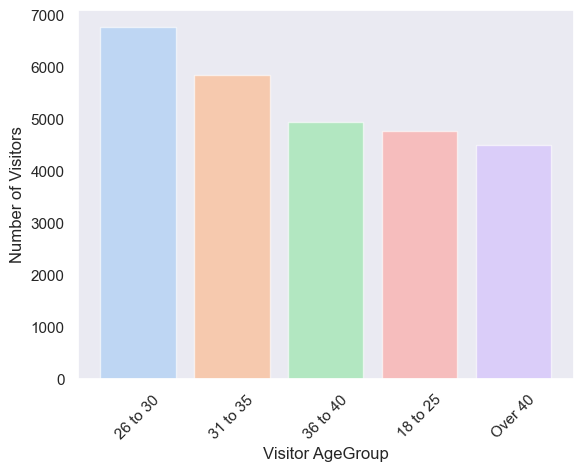

In [12]:
make_plot_bar_chart(plt,df['Age_Group'].value_counts().index,df['Age_Group'].value_counts().values,x_label='Visitor AgeGroup',y_label='Number of Visitors',title='',img_name='Visitors_agegroup.png')

From which areas visitors came.

In [13]:

df_top_areas = pd.DataFrame()
df_top_areas['Area']=df['Visitor_City'].value_counts().head(10).index
df_top_areas['Visitors Count']=df['Visitor_City'].value_counts().head(10).values
df_top_areas

,Area,Visitors Count
0,Dundee,1404
1,London,1384
2,Sheffield,1370
3,Swindon,1370
4,Luton,1367
5,Glasgow,1365
6,Preston,1364
7,Nottingham,1354
8,Blackpool,1350
9,Gloucester,1347


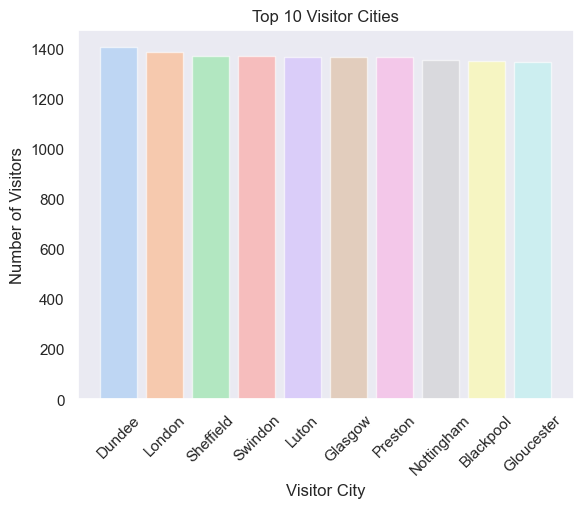

In [14]:
make_plot_bar_chart(plt,df_top_areas["Area"],df_top_areas["Visitors Count"],x_label='Visitor City',y_label='Number of Visitors',title='Top 10 Visitor Cities',img_name='top_10_visitor_cities.png')

In [15]:
# custom pie chart function to be used in EDA notebook
def make_pie_chart(matplot_plt,data_frame,pie_chart_labels,pie_chart_values,colors,title,image_path,image_name):
    matplot_plt.figure(figsize=(6, 6))
    matplot_plt.pie(data_frame[pie_chart_values], labels = data_frame[pie_chart_labels], colors = colors, autopct='%.0f%%')
    matplot_plt.title(title, bbox={'facecolor':'0.8', 'pad':5})
    matplot_plt.savefig(image_path+image_name, format='png', bbox_inches='tight')
    matplot_plt.show()

Gender wise entrance in the event.

In [16]:
df_gender = pd.DataFrame()
df_gender['Gender_Type']=df['Gender'].value_counts().index
df_gender['Count']=df['Gender'].value_counts().values
df_gender


,Gender_Type,Count
0,Female,9362
1,Male,9324
2,Non-binary,4176
3,Prefer not to say,1354
4,Trans Man,1321
5,Trans Woman,1320


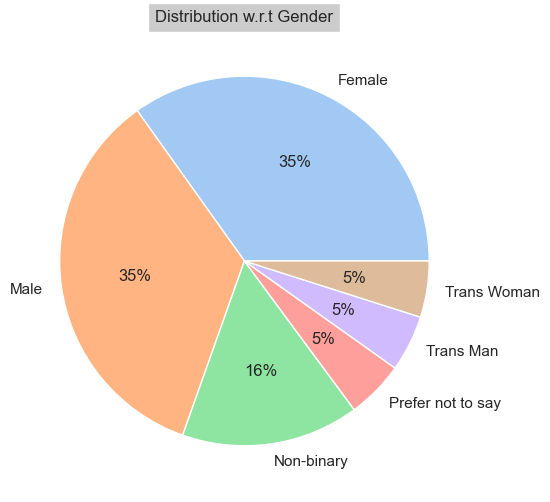

In [17]:
  
make_pie_chart(plt,df_gender,'Gender_Type','Count',colors,"Distribution w.r.t Gender",image_S,"Visitor w.r.t gender.png")                             

Attendance by pre-event information: guided vs unguided visitors.

In [18]:
df_preEvent = pd.DataFrame()
df_preEvent['PreEvent_Information_Source']=df['PreEvent_Information_Source'].value_counts().head(10).index
df_preEvent['Count']=df['PreEvent_Information_Source'].value_counts().head(10).values
df_preEvent

 

,PreEvent_Information_Source,Count
0,No Guidance,10756
1,Volunteer/Staff Guidance,8021
2,App Instructions,4014
3,Website Information Page,2668
4,Email Notification,1398


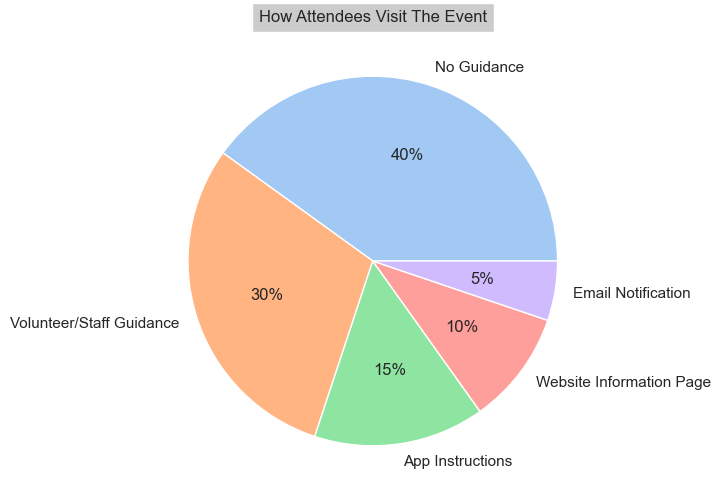

In [19]:

make_pie_chart(plt,df_preEvent,'PreEvent_Information_Source','Count',colors,"How Attendees Visit The Event",image_S,"pre_event_awareness.png")

In [20]:
def make_wordcloud(matplot_plt,df,column_name,image_path,image_name,colud_text=''):
    from wordcloud import WordCloud, STOPWORDS

    text_data = ' '.join(df[column_name].dropna().tolist())
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords, min_font_size=10).generate(text_data)
    matplot_plt.figure(figsize=(8, 8), facecolor=None)
    matplot_plt.imshow(wordcloud)
    matplot_plt.axis("off")
    matplot_plt.title(colud_text)
    matplot_plt.tight_layout(pad=0)
    matplot_plt.savefig(image_path+image_name, format='png', bbox_inches='tight')
    matplot_plt.show()  

Which transport mode is used to reach at event place.

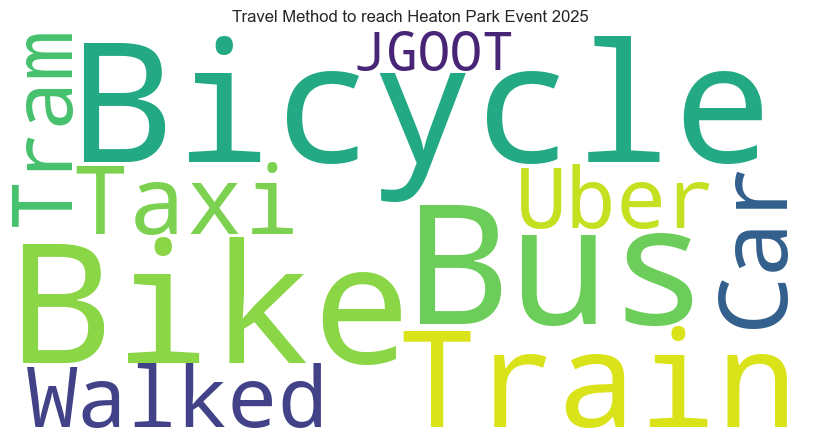

In [21]:
make_wordcloud(plt,df,'Travel_method',image_S,'Travel_method.png','Travel Method to reach Heaton Park Event 2025')    

Geographical analysis:

In [22]:
cities_df = (
    df.groupby('Visitor_City')
      .agg(
          City_Value_Count=('Visitor_City', 'count'),
          Latitude=('Latitude', 'first'),
          Longitude=('Longitude', 'first')
      )
      .reset_index()
)
cities_df.head()

,Visitor_City,City_Value_Count,Latitude,Longitude
0,Birmingham,1297,52.479699,-1.902691
1,Blackpool,1350,53.817944,-3.050981
2,Bolton,1279,53.578286,-2.430037
3,Bradford,1328,53.794423,-1.751919
4,Bristol,1319,51.453802,-2.597298


In [23]:

import folium
# 1. Prepare city data with latitude and longitude
m=folium.Map(tiles='OpenStreetMap', zoom_start=7, max_zoom=15, control_scale=True, location=[53.47, -2.24])



# 3. Add circular markers for each city
for index, row in cities_df.iterrows():
    
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            radius=row['City_Value_Count'] / 100,  # Scale the value to a visible radius (adjust 100 as needed)
            tooltip="Click me!",
            popup=f"<b>**{row['Visitor_City']}**</b><br> has {row['City_Value_Count']} Visitors",
            icon=folium.Icon(color="green")
            
        ).add_to(m)




# Calculate bounds of all markers
max_lat, min_lat = max(cities_df['Latitude']), min(cities_df['Latitude'])
max_lon, min_lon = max(cities_df['Longitude']), min(cities_df['Longitude'])
# Set map bounds to include all markers
m.fit_bounds([[min_lat, min_lon], [max_lat, max_lon]])

# # 4. Save the map to an HTML file
output_file = "uk_city_count_map.html"
# plt.savefig(image_S+"outliers_fixation_comparison.png", format='png',bbox_inches='tight')
m.save(image_S+output_file)

print(f"Map saved successfully as '{output_file}'")
print("Open the HTML file in your web browser to view the interactive map.")
display(m)


Map saved successfully as 'uk_city_count_map.html'
Open the HTML file in your web browser to view the interactive map.


Visitor tracking and interest for next year as volunteer worker.

In [24]:
city_volunteer_df = (
    df.groupby('Visitor_City')
      .agg(
          Total_Visitors=('Visitor_City', 'count'),
          Want_To_Volunteer=('Volunteer_Next_Year', 'sum')
      )
      .reset_index()
)

city_volunteer_df['Do_Not_Want'] = (
    city_volunteer_df['Total_Visitors'] - city_volunteer_df['Want_To_Volunteer']
)


city_volunteer_df["Success_Percentage_Rate"]=  round((city_volunteer_df['Want_To_Volunteer'] / city_volunteer_df['Total_Visitors']) * 100,2)
city_volunteer_df.head()

,Visitor_City,Total_Visitors,Want_To_Volunteer,Do_Not_Want,Success_Percentage_Rate
0,Birmingham,1297,792,505,61.06
1,Blackpool,1350,823,527,60.96
2,Bolton,1279,812,467,63.49
3,Bradford,1328,849,479,63.93
4,Bristol,1319,829,490,62.85


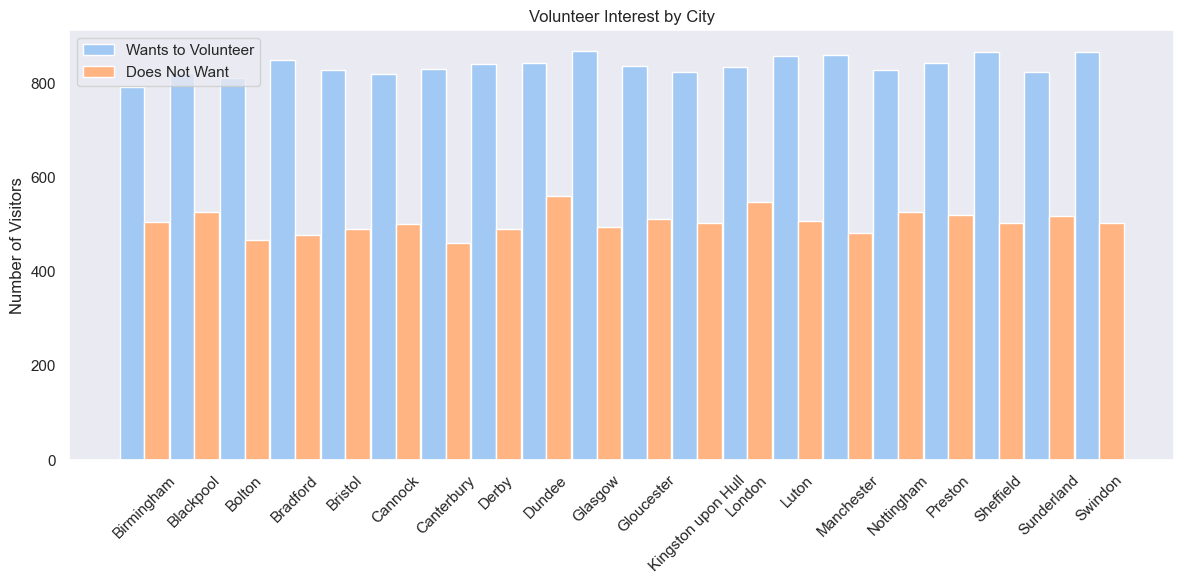

In [25]:
import numpy as np

x = np.arange(len(city_volunteer_df))
width = 0.49

plt.figure(figsize=(12, 6))

plt.bar(x - width/2, city_volunteer_df['Want_To_Volunteer'], width, label='Wants to Volunteer')
plt.bar(x + width/2, city_volunteer_df['Do_Not_Want'], width, label='Does Not Want')

plt.xticks(x, city_volunteer_df['Visitor_City'], rotation=45)
plt.ylabel('Number of Visitors')
plt.title('Volunteer Interest by City')
plt.legend()

plt.tight_layout()
plt.savefig(image_S+'volunteer_interest_by_city.png', format='png', bbox_inches='tight')
plt.show()


Sentimental Analysis:

1) Data Prepration for analysis
2) Sentiments analysis via Vader
3) Sentiments Analysis Via DistilBert Model
4) Word Cloud

In [26]:
import re

def clean_text(text):
    text = str(text).lower() 
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text
# Common placeholders to treat as missing
placeholders = ['Nothing', 'No notes!','', 'n/a', 'na', 'none', 'N/A', 'None', 'NA','NaN','No','NO']
placeholder_replacement = "No Comments!"
cols_to_fix=['First_impression','What_we_can_improve',	'Want_to_see_next_year']


for col in cols_to_fix:

    df[col] = df[col].replace(placeholders, placeholder_replacement)
    df[col] = df[col].fillna(placeholder_replacement)
    df[col] = df[col].apply(clean_text)
    


df.head()




,PreEvent_Information_Source,Age_Group,Gender,Visitor_City,County,Latitude,Longitude,Travel_method,First_impression,What_we_can_improve,Want_to_see_next_year,Volunteer_Next_Year
0,Website Information Page,31 to 35,Male,Manchester,Greater Manchester,53.479489,-2.245115,Car,some food stalls overpriced,longer queues popular stalls,more picnic zones near attractions,1
1,App Instructions,18 to 25,Male,Derby,Derbyshire,52.914223,-1.471988,Taxi,too noisy kids,more variety in food stalls,more costume fancy dress activities,1
2,No Guidance,18 to 25,Male,Sheffield,South Yorkshire,53.380663,-1.470228,Uber,inclusive accessible spaces for all ages n abi...,more water stations,improved signage,1
3,Website Information Page,18 to 25,Trans Woman,Bradford,West Yorkshire,53.794423,-1.751919,Tram,some areas too crowded,more local artisan stalls,more funfair rides,1
4,Website Information Page,Over 40,Male,Derby,Derbyshire,52.914223,-1.471988,Bus,treasure hunts scavenger hunts,cheaper food options,better organization,1


In [27]:
# ----------- 🧱 STEP 2: Combine text fields for sentiment -----------
feedback_cols=['First_impression','What_we_can_improve',	'Want_to_see_next_year']
# Fill remaining NaNs with empty string and combine fields
df['All_Feedback'] = df[feedback_cols].fillna('').agg(' '.join, axis=1).str.strip()
df[['All_Feedback']]


,All_Feedback
0,some food stalls overpriced longer queues popu...
1,too noisy kids more variety in food stalls mor...
2,inclusive accessible spaces for all ages n abi...
3,some areas too crowded more local artisan stal...
4,treasure hunts scavenger hunts cheaper food op...
...,...
26852,lve music concerts extra toilets more storytel...
26853,too few interactive workshops better restroom ...
26854,too far from public transport better signage m...
26855,local artisan markets improved sound system be...


In [28]:
df_feedback_sample=df[['First_impression','What_we_can_improve','Want_to_see_next_year','All_Feedback']].head(10)
df_feedback_sample

,First_impression,What_we_can_improve,Want_to_see_next_year,All_Feedback
0,some food stalls overpriced,longer queues popular stalls,more picnic zones near attractions,some food stalls overpriced longer queues popu...
1,too noisy kids,more variety in food stalls,more costume fancy dress activities,too noisy kids more variety in food stalls mor...
2,inclusive accessible spaces for all ages n abi...,more water stations,improved signage,inclusive accessible spaces for all ages n abi...
3,some areas too crowded,more local artisan stalls,more funfair rides,some areas too crowded more local artisan stal...
4,treasure hunts scavenger hunts,cheaper food options,better organization,treasure hunts scavenger hunts cheaper food op...
5,first aid not visible,extra toilets,better signage maps,first aid not visible extra toilets better sig...
6,food options r limited,more picnic areas,more quiz trivia events,food options r limited more picnic areas more ...
7,open jam sessions for musicians,interactive activities teenagers,more storytelling sessions,open jam sessions for musicians interactive ac...
8,familyfriendly competitions egg spoon sack race,more kids competitions,more familyfriendly competitions,familyfriendly competitions egg spoon sack rac...
9,expensive food drinks,should last longer,more ice cream sweet stalls,expensive food drinks should last longer more ...


In [29]:
# Create a cleaned version for sentiment analysis
df['Feedback_for_Sentiment'] = df['All_Feedback'].str.replace("No Comments!", "", regex=False).str.strip()
df[['Feedback_for_Sentiment']]

,Feedback_for_Sentiment
0,some food stalls overpriced longer queues popu...
1,too noisy kids more variety in food stalls mor...
2,inclusive accessible spaces for all ages n abi...
3,some areas too crowded more local artisan stal...
4,treasure hunts scavenger hunts cheaper food op...
...,...
26852,lve music concerts extra toilets more storytel...
26853,too few interactive workshops better restroom ...
26854,too far from public transport better signage m...
26855,local artisan markets improved sound system be...


Sentiments analysis via Vader

In [30]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

df['Sentiment_Score_Via_Vader'] = df['Feedback_for_Sentiment'].apply(
    lambda x: sia.polarity_scores(x)['compound']
)

df['Sentiment_Label_Via_Vader'] = df['Sentiment_Score_Via_Vader'].apply(
    lambda x: 'Positive' if x > 0.05 else ('Negative' if x < -0.05 else 'Neutral')
)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\touqe\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Top 10 feedback with sentiment score and label

In [31]:
Vader_df=df[['Feedback_for_Sentiment','Sentiment_Score_Via_Vader','Sentiment_Label_Via_Vader']]
Vader_df.head(10)


,Feedback_for_Sentiment,Sentiment_Score_Via_Vader,Sentiment_Label_Via_Vader
0,some food stalls overpriced longer queues popu...,0.6808,Positive
1,too noisy kids more variety in food stalls mor...,-0.1779,Negative
2,inclusive accessible spaces for all ages n abi...,0.6557,Positive
3,some areas too crowded more local artisan stal...,0.0000,Neutral
4,treasure hunts scavenger hunts cheaper food op...,0.6249,Positive
5,first aid not visible extra toilets better sig...,0.4404,Positive
6,food options r limited more picnic areas more ...,-0.2263,Negative
7,open jam sessions for musicians interactive ac...,0.0000,Neutral
8,familyfriendly competitions egg spoon sack rac...,0.0000,Neutral
9,expensive food drinks should last longer more ...,0.5046,Positive


Lets observe the feedback with wordcloud

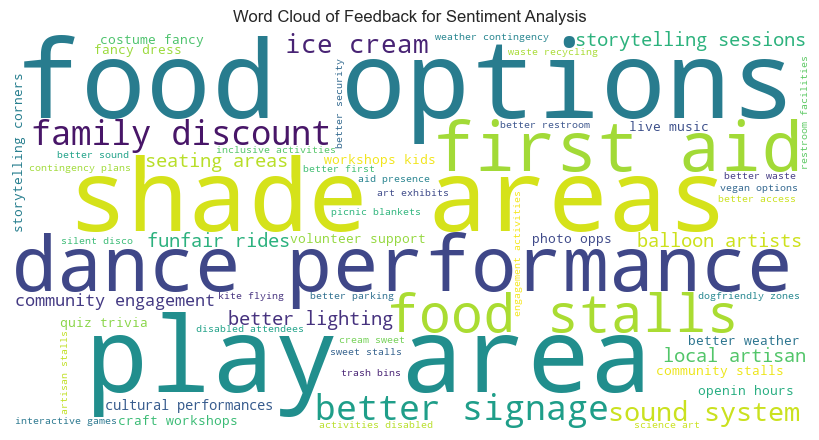

In [32]:
make_wordcloud(plt,df,'Feedback_for_Sentiment',image_S,'Feedback_for_Sentiment.png','Word Cloud of Feedback for Sentiment Analysis')


In [33]:
Vader_pos=Vader_df[Vader_df['Sentiment_Label_Via_Vader']=='Positive']
Vader_neut=Vader_df[Vader_df['Sentiment_Label_Via_Vader']=='Neutral']
Vader_neg=Vader_df[Vader_df['Sentiment_Label_Via_Vader']=='Negative']


Positive feedback wordcloud

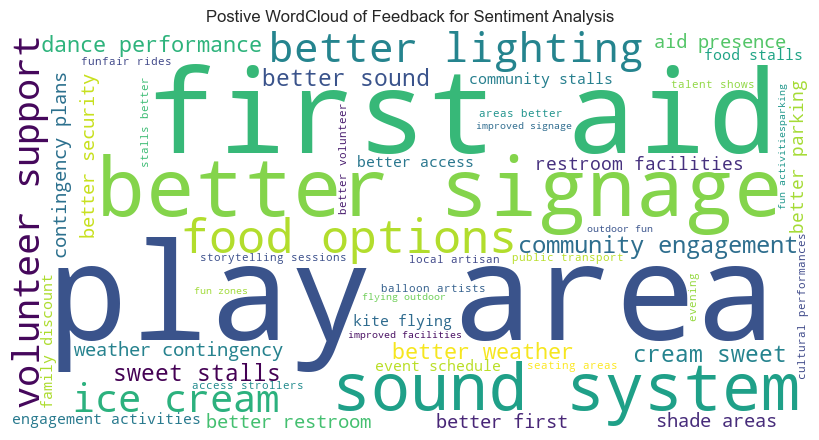

In [34]:
make_wordcloud(plt,Vader_pos,'Feedback_for_Sentiment',image_S,'Positive Feedback Via Vader.png','Postive WordCloud of Feedback for Sentiment Analysis')

Negative feedback wordcloud

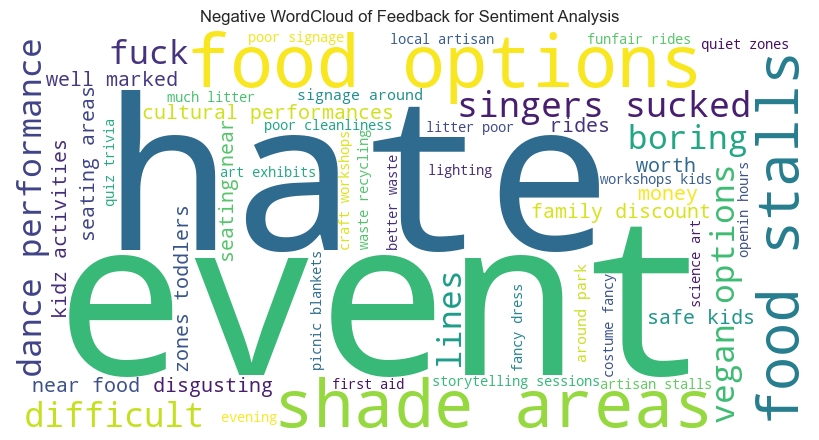

In [35]:
make_wordcloud(plt,Vader_neg,'Feedback_for_Sentiment',image_S,'Negative Feedback Via Vader.png','Negative WordCloud of Feedback for Sentiment Analysis')

Neutral or Constructive feedback wordcloud

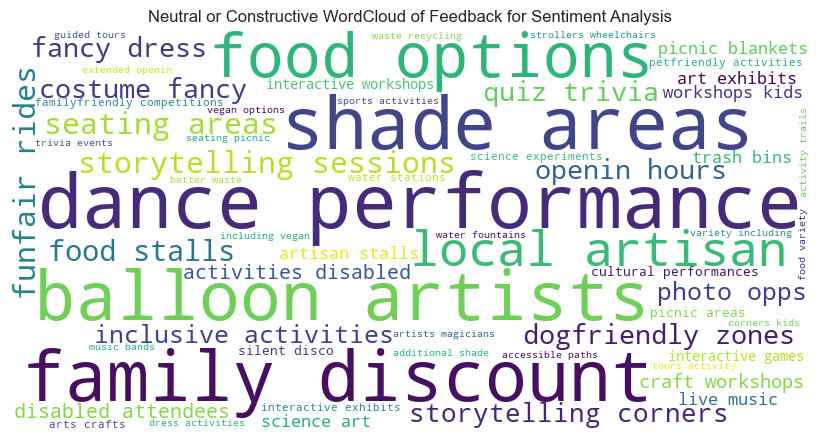

In [36]:
make_wordcloud(plt,Vader_neut,'Feedback_for_Sentiment',image_S,'Neutral or Constructive Feedback Via Vader.png','Neutral or Constructive WordCloud of Feedback for Sentiment Analysis')

In [37]:
df_cross_SentimentsVSlabels=pd.crosstab(df['Feedback_for_Sentiment'], df['Sentiment_Label_Via_Vader'], normalize='index')

In [38]:
df_cross_SentimentsVSlabels[df_cross_SentimentsVSlabels['Positive']>0].head(10)

Sentiment_Label_Via_Vader,Negative,Neutral,Positive
Feedback_for_Sentiment,,,
animal petting zones farm animals better access public transport cleaner environment,0.0,0.0,1.0
animal petting zones farm animals better access strollers bigger kids play area,0.0,0.0,1.0
animal petting zones farm animals better access strollers more competitions kids,0.0,0.0,1.0
animal petting zones farm animals better first aid presence better lighting in evening,0.0,0.0,1.0
animal petting zones farm animals better first aid presence cleaner environment,0.0,0.0,1.0
animal petting zones farm animals better first aid presence improved accessibilitymore kidfriendly activities,0.0,0.0,1.0
animal petting zones farm animals better first aid presence more fun activitiesparking spaces,0.0,0.0,1.0
animal petting zones farm animals better first aid presence more sports activities,0.0,0.0,1.0
animal petting zones farm animals better first aid presence more trash bins,0.0,0.0,1.0


Lets observe the negative feedback

In [39]:
df_cross_SentimentsVSlabels[df_cross_SentimentsVSlabels['Negative']>0].head(10)

Sentiment_Label_Via_Vader,Negative,Neutral,Positive
Feedback_for_Sentiment,,,
animal petting zones farm animals better parking facilities i hate this event,1.0,0.0,0.0
animal petting zones farm animals extra toilets i hate this event,1.0,0.0,0.0
animal petting zones farm animals food was disgusting more evening entertainment,1.0,0.0,0.0
animal petting zones farm animals food was disgusting more photo opps,1.0,0.0,0.0
animal petting zones farm animals not worth the money extended openin hours,1.0,0.0,0.0
animal petting zones farm animals not worth the money more dogfriendly zones,1.0,0.0,0.0
animal petting zones farm animals not worth the money more science art exhibits,1.0,0.0,0.0
animal petting zones farm animals rides were boring more live music bands,1.0,0.0,0.0
animal petting zones farm animals rides were boring more photo opps,1.0,0.0,0.0


In [40]:
pd.crosstab(df['Sentiment_Label_Via_Vader'], df['Volunteer_Next_Year'], normalize='index')


Volunteer_Next_Year,0,1
Sentiment_Label_Via_Vader,,
Negative,0.370824,0.629176
Neutral,0.373462,0.626538
Positive,0.378396,0.621604


The above results show that willingness to volunteer is not limited to visitors with positive experiences. Many participants who reported neutral or negative sentiments still expressed interest in volunteering next year, indicating that critical feedback reflects constructive engagement rather than dissatisfaction.

In [41]:
PreEvent_Information_Source=pd.crosstab(df['PreEvent_Information_Source'], df['Sentiment_Label_Via_Vader'], normalize='index')
round(PreEvent_Information_Source,2)

Sentiment_Label_Via_Vader,Negative,Neutral,Positive
PreEvent_Information_Source,,,
App Instructions,0.15,0.24,0.61
Email Notification,0.15,0.22,0.63
No Guidance,0.15,0.22,0.62
Volunteer/Staff Guidance,0.16,0.23,0.61
Website Information Page,0.15,0.22,0.63


In [42]:
PreEvent_Information_Source=pd.crosstab(df['Age_Group'], df['Sentiment_Label_Via_Vader'], normalize='index')
round(PreEvent_Information_Source,2)

Sentiment_Label_Via_Vader,Negative,Neutral,Positive
Age_Group,,,
18 to 25,0.15,0.24,0.60
26 to 30,0.15,0.22,0.63
31 to 35,0.16,0.22,0.62
36 to 40,0.16,0.23,0.61
Over 40,0.15,0.22,0.63


The above results indicate that different age groups provide varied feedback; however, the majority of attendees across all ages expressed a positive perception of the event.

In [43]:
df['Volunteer_Next_Year'].value_counts()

Volunteer_Next_Year
1    16756
0    10101
Name: count, dtype: Int64

In [44]:
# PreEvent_Information_Sourcess=pd.crosstab(df['PreEvent_Information_Source'], df['Volunteer_Next_Year'], normalize='index')
PreEvent_Information_Sourcess=pd.crosstab(df['PreEvent_Information_Source'], df['Volunteer_Next_Year']).reset_index()

PreEvent_Information_Sourcess.rename(columns={0: "Dont_Want_Volunteer", 1: "Want_Volunteer_Next_Year"}, inplace=True)



PreEvent_Information_Sourcess


Volunteer_Next_Year,PreEvent_Information_Source,Dont_Want_Volunteer,Want_Volunteer_Next_Year
0,App Instructions,955,3059
1,Email Notification,469,929
2,No Guidance,6413,4343
3,Volunteer/Staff Guidance,1458,6563
4,Website Information Page,806,1862


Above dataframe, indicated visitors with access to pre-event information show higher intent to revisit and volunteer, whereas those without guidance demonstrate lower engagement.

Volunteer interest w.r.t Age Group

In [45]:
cross_AgeGroup_Volunteer=pd.crosstab(df['Age_Group'], df['Volunteer_Next_Year'])
round(cross_AgeGroup_Volunteer,2)

Volunteer_Next_Year,0,1
Age_Group,,
18 to 25,1754,3016
26 to 30,2549,4222
31 to 35,2237,3620
36 to 40,1842,3114
Over 40,1719,2784


Gender wise feedback w.r.t sentiment label.

In [46]:
cross_Gender_SentimentLabel=pd.crosstab(df['Gender'], df['Sentiment_Label_Via_Vader'])
round(cross_Gender_SentimentLabel,2)

Sentiment_Label_Via_Vader,Negative,Neutral,Positive
Gender,,,
Female,1428,2123,5811
Male,1486,2125,5713
Non-binary,632,942,2602
Prefer not to say,203,304,847
Trans Man,215,297,809
Trans Woman,197,306,817


Sentimental Analysis Via DistilBert Model

In [47]:
from transformers import pipeline
import torch


# sample_df = df.sample(25000, random_state=42)

sample_df = df

# Define device properly
device = 0 if torch.cuda.is_available() else -1

# Convert column to list
texts = sample_df['Feedback_for_Sentiment'].tolist()

# Load sentiment model (explicit + clean)
sentiment_model = pipeline(
    "sentiment-analysis",
    model="distilbert/distilbert-base-uncased-finetuned-sst-2-english",
    device=device
)

# Run sentiment in batches
results = sentiment_model(
    texts,
    batch_size=128,
    truncation=True
)

# Store results back to DataFrame
sample_df['BERT_Sentiment_Via_DistilBert'] = [r['label'] for r in results]
sample_df['BERT_Sentiment_Score_Via_DistilBert'] = [r['score'] for r in results]


Device set to use cpu


In [48]:
bert_sample_df=sample_df[['Feedback_for_Sentiment','BERT_Sentiment_Via_DistilBert','BERT_Sentiment_Score_Via_DistilBert']].head(10)
bert_sample_df

,Feedback_for_Sentiment,BERT_Sentiment_Via_DistilBert,BERT_Sentiment_Score_Via_DistilBert
0,some food stalls overpriced longer queues popu...,NEGATIVE,0.986569
1,too noisy kids more variety in food stalls mor...,NEGATIVE,0.997850
2,inclusive accessible spaces for all ages n abi...,POSITIVE,0.998448
3,some areas too crowded more local artisan stal...,NEGATIVE,0.993815
4,treasure hunts scavenger hunts cheaper food op...,NEGATIVE,0.987907
5,first aid not visible extra toilets better sig...,NEGATIVE,0.998202
6,food options r limited more picnic areas more ...,NEGATIVE,0.987201
7,open jam sessions for musicians interactive ac...,POSITIVE,0.993229
8,familyfriendly competitions egg spoon sack rac...,NEGATIVE,0.986430
9,expensive food drinks should last longer more ...,NEGATIVE,0.996331


In [49]:
sample_df['BERT_Sentiment_Via_DistilBert'].value_counts()

BERT_Sentiment_Via_DistilBert
NEGATIVE    22532
POSITIVE     4325
Name: count, dtype: int64

In [50]:
df['Sentiment_Label_Via_Vader'].value_counts()

Sentiment_Label_Via_Vader
Positive    16599
Neutral      6097
Negative     4161
Name: count, dtype: int64

Top five most repeated feedback.

In [51]:
df['All_Feedback'].value_counts().sort_values(ascending=False).nlargest(5)


All_Feedback
balloon artists singers sucked more dance performances                                                        3
too much walking between attractions event was poorly organized more live djs or silent discos teensadults    3
crowded play areas more live music performances more familyfriendly competitions                              3
no quiet zones toddlers more interactive science art exhibits better sound system for live performances       3
some activities not safe kids not worth the money more charity community stalls                               3
Name: count, dtype: int64

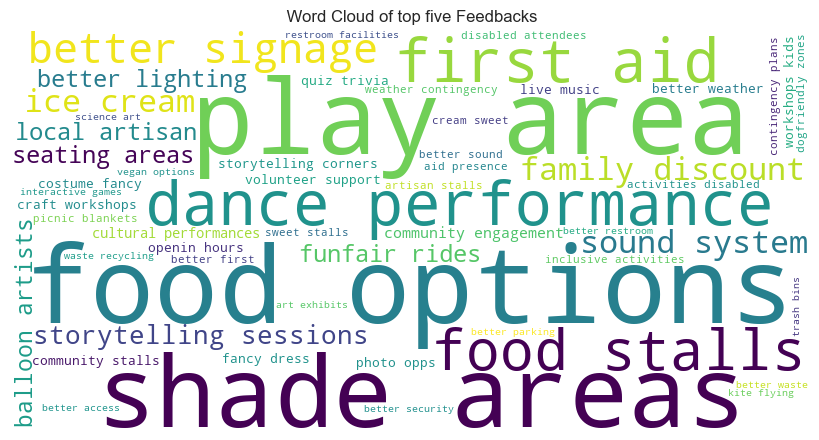

In [52]:
make_wordcloud(plt,df,'All_Feedback',image_S,'All_Feedback.png',' Word Cloud of top five Feedbacks')

In [53]:
file = open("Sentiment-analysis-Case-Study.html","w")

file.write("""
<html>
<head>
<title>Rana Attique | Pre-Inspection Vehicle Classification - Case Study (2025)</title>
<link rel='stylesheet' href='https://maxcdn.bootstrapcdn.com/bootstrap/4.5.2/css/bootstrap.min.css'>
<script src='https://ajax.googleapis.com/ajax/libs/jquery/3.6.0/jquery.min.js'></script>
<script src='https://maxcdn.bootstrapcdn.com/bootstrap/4.5.2/js/bootstrap.min.js'></script>

<style>
table {border-collapse: collapse; width:100%;}
th, td {padding: 6px; text-align: center; border-bottom: 2px solid #ddd; font-size:14px;}
tr:hover {background-color: #f0f8ff;}
h2, h3, h4 {padding-top: 10px;}
li {margin-bottom:8px;}
</style>
</head>

<body>
<div class='container'>

<center>
<h2><b>Manchester Echoes Visitor Sentiment Study at Heaton Park</b></h2>
<h4>Presented By: <b>Rana Touqeer Attique</b></h4>
<a href='https://www.linkedin.com/in/rprof' target='_blank'><b>Visit LinkedIn Profile</b></a>

           
<section class="my-3" style="text-align:center;">
  <h6 style="margin-top:8px; font-weight:600;">
    This dataset has been intentionally modified for research and learning purposes. Several variables were programmatically manipulated to introduce controlled ambiguity and realistic behavioural patterns. The dataset should therefore be used for analytical demonstration, modelling, and exploratory research only, and not interpreted as a direct representation of real-world survey outcomes.
  </h6>

  <div class="mt-3" style="text-align:center;">
    <strong>Key stages covered:</strong><br>

    <ul style="display:inline-block; text-align:left; margin-top:8px;">
           
  <li>Data cleaning and data wrangling</li>
  <li>Handling missing, ambiguous, and inconsistent values</li>
  <li>Exploratory Data Analysis (EDA)</li>
  <li>Analysis of demographic and attendance patterns</li>
  <li>Data preparation for sentiment analysis</li>
  <li>Text normalization and feedback consolidation</li>
  <li>Sentiment analysis using NLP techniques (VADER and DistilBERT models)</li>
  <li>Insight extraction from sentiment results</li>
  <li>Visualisation of key findings</li>
  <li>Word cloud generation to highlight dominant feedback themes</li>
     
    </ul>
  </div>
</section>
           
           <hr>
<h4><b> Data Preparation & Standardization</b></h4>
<li>Final Dataframe after converison and removing null values.</li>
""" + col_df.to_html() + """



<h4><b> Sentiment Analysis Visuals & DataFrames</b></h4>
<img src='""" + image_S + """Visitor w.r.t gender.png' alt='Chart Missing'>

<h6><b>• Visitors w.r.t Age Group</b></h6>
<img src='""" + image_S + """Visitors_agegroup.png' alt='Chart Missing'>
 
<h6><b>• Top 10 cities, visitors came from.</b></h6>
<img src='""" + image_S + """top_10_visitor_cities.png' alt='Chart Missing'>

<h6><b>• Attendies Pre-Event Awareness.</b></h6>
<img src='""" + image_S + """pre_event_awareness.png' alt='Chart Missing'>

<h6><b>• Travel Method explain via wordcloud.</b></h6>
<img src='""" + image_S + """Travel_method.png' alt='Chart Missing'>


<h6><b>• Geographical Distribution by City</b></h6>
<iframe src='""" + image_S + """uk_city_count_map.html' width='800' height='600' frameborder='0'></iframe>



<h6><b><li>Visitors who agreed to come back next year as volunteer</li></b></h6>
""" + city_volunteer_df.to_html() + """



<h6><b></b></h6>
<img src='""" + image_S + """volunteer_interest_by_city.png' alt='Chart Missing'>

<li>Feedback Sample Data</li>
""" + df_feedback_sample.to_html() + """

<h6><b><li>Sentimental analysis via Vadar Model (First 10 Rows)</li></b></h6>
""" + Vader_df.head(10).to_html()  + """


<h6><b><li>Positive feedback via Vader</li></b></h6>
<img src='""" + image_S + """Positive Feedback Via Vader.png' alt='Chart Missing'>


<h6><b><li>Negative feedback via Vader</li></b></h6>
<img src='""" + image_S + """Negative Feedback Via Vader.png' alt='Chart Missing'>

<h6><b><li>Neutral or Constructive Feedback Via Vader</li></b></h6>
<img src='""" + image_S + """Neutral or Constructive Feedback Via Vader.png' alt='Chart Missing'>



<h6><b><li>Sentiment score via Distil Bert model</li></b></h6>
""" + bert_sample_df.to_html() + """

<h6><b><li>Top five most repeated feedback</li></b></h6>
<img src='""" + image_S + """All_Feedback.png' alt='Chart Missing'




<h6><b><li>PreEvent_Information_Sourcess</li></b></h6>
""" + PreEvent_Information_Sourcess.to_html() + """


<h6 style="margin-top:8px; font-weight:600;">
   Conclusion: Based on the data, volunteers who received App Instructions or Volunteer/Staff Guidance were much more likely to want to volunteer next year, while those with No Guidance were less likely to return. Overall, proactive pre-event communication appears to strongly increase volunteer retention.
 </h6>



</div></body></html>
""")

file.close()


main file below

In [54]:
print("Completed Successfully!")

Completed Successfully!
